<a href="https://colab.research.google.com/github/susooo/data-analysis/blob/main/1_3_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**데이터프레임 결합**

###상하 결합

In [56]:
import pandas as pd

df1 = pd.DataFrame({'A' : [1, 2, 3], 'B' : [4, 5, 6], 'C' : [7, 8, 9]})
df2 = pd.DataFrame({'A' : [10, 11, 12], 'B' : [13, 14, 15], 'C' : [16, 17, 18]})

In [57]:
df1

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9


In [58]:
df2

,A,B,C
0,10,13,16
1,11,14,17
2,12,15,18


In [59]:
pd.concat([df1, df2])

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
0,10,13,16
1,11,14,17
2,12,15,18


In [60]:
#인덱스 초기화
pd.concat([df1, df2], ignore_index = True)

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
3,10,13,16
4,11,14,17
5,12,15,18


In [61]:
df3 = pd.DataFrame({'A' : [1, 2, 3], 'B' : [4, 5, 6], 'C' : [7, 8, 9]})
df4 = pd.DataFrame({'A' : [10, 11, 12], 'B' : [13, 14, 15], 'C' : [16, 17, 18]})

In [62]:
pd.concat([df3, df4])

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
0,10,13,16
1,11,14,17
2,12,15,18


In [63]:
#합집합
pd.concat([df3, df4], join = 'outer')

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
0,10,13,16
1,11,14,17
2,12,15,18


In [64]:
#교집합
pd.concat([df3, df4], join = 'inner')

,A,B,C
0,1,4,7
1,2,5,8
2,3,6,9
0,10,13,16
1,11,14,17
2,12,15,18


###좌우 결합

In [65]:
import pandas as pd

df1 = pd.DataFrame({'A' : [1, 2, 3], 'B' : [4, 5, 6], 'C' : [7, 8, 9]})
df2 = pd.DataFrame({'E' : [10, 11, 12], 'F' : [13, 14, 15], 'G' : [16, 17, 18]})

In [66]:
pd.concat([df1, df2], axis = 1)

,A,B,C,E,F,G
0,1,4,7,10,13,16
1,2,5,8,11,14,17
2,3,6,9,12,15,18


In [67]:
df1 = pd.DataFrame({'ID' : [1, 2, 3, 4, 5], '성별' : ['F', 'M', 'F', 'M', 'F'], '나이' : [20, 30, 40, 25, 42]})
df2 = pd.DataFrame({'ID' : [3, 4, 5, 6, 7], '키' : [160.5, 170.3, 180.1, 142.3, 153.7], '몸무게' : [45.1, 50.3, 72.1, 38,  42]})

In [68]:
#왼쪽 df1의 ID를 기준으로 결합
pd.merge(df1, df2, how = 'left', on = 'ID')

,ID,성별,나이,키,몸무게
0,1,F,20,NaN,NaN
1,2,M,30,NaN,NaN
2,3,F,40,160.5,45.1
3,4,M,25,170.3,50.3
4,5,F,42,180.1,72.1


In [69]:
#오른쪽 df2의 ID를 기준으로 결합
pd.merge(df1, df2, how = 'right', on = 'ID')

,ID,성별,나이,키,몸무게
0,3,F,40.0,160.5,45.1
1,4,M,25.0,170.3,50.3
2,5,F,42.0,180.1,72.1
3,6,NaN,NaN,142.3,38.0
4,7,NaN,NaN,153.7,42.0


In [70]:
#NaN이 없는 데이터만
pd.merge(df1, df2, how = 'inner', on = 'ID')

,ID,성별,나이,키,몸무게
0,3,F,40,160.5,45.1
1,4,M,25,170.3,50.3
2,5,F,42,180.1,72.1


In [71]:
#모든 데이터
pd.merge(df1, df2, how = 'outer', on = 'ID')

,ID,성별,나이,키,몸무게
0,1,F,20.0,NaN,NaN
1,2,M,30.0,NaN,NaN
2,3,F,40.0,160.5,45.1
3,4,M,25.0,170.3,50.3
4,5,F,42.0,180.1,72.1
5,6,NaN,NaN,142.3,38.0
6,7,NaN,NaN,153.7,42.0


In [72]:
df1 = pd.DataFrame({'USER_ID' : [1, 2, 3, 4, 5], '성별' : ['F', 'M', 'F', 'M', 'F'], '나이' : [20, 30, 40, 25, 42]})
df2 = pd.DataFrame({'ID' : [3, 4, 5, 6, 7], '키' : [160.5, 170.3, 180.1, 142.3, 153.7], '몸무게' : [45.1, 50.3, 72.1, 38,  42]})

In [73]:
#df1의 기준열은 USER_ID, df2의 기준열은 ID
pd.merge(df1, df2, how = 'outer', left_on = 'USER_ID', right_on = 'ID')

,USER_ID,성별,나이,ID,키,몸무게
0,1.0,F,20.0,NaN,NaN,NaN
1,2.0,M,30.0,NaN,NaN,NaN
2,3.0,F,40.0,3.0,160.5,45.1
3,4.0,M,25.0,4.0,170.3,50.3
4,5.0,F,42.0,5.0,180.1,72.1
5,NaN,NaN,NaN,6.0,142.3,38.0
6,NaN,NaN,NaN,7.0,153.7,42.0


In [74]:
#df1의 기준열은 USER_ID, df2의 기준열은 키
pd.merge(df1, df2, how = 'outer', left_on = 'USER_ID', right_on = '키')

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1218: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,USER_ID,성별,나이,ID,키,몸무게
0,1.0,F,20.0,NaN,NaN,NaN
1,2.0,M,30.0,NaN,NaN,NaN
2,3.0,F,40.0,NaN,NaN,NaN
3,4.0,M,25.0,NaN,NaN,NaN
4,5.0,F,42.0,NaN,NaN,NaN
5,NaN,NaN,NaN,3.0,160.5,45.1
6,NaN,NaN,NaN,4.0,170.3,50.3
7,NaN,NaN,NaN,5.0,180.1,72.1
8,NaN,NaN,NaN,6.0,142.3,38.0
9,NaN,NaN,NaN,7.0,153.7,42.0


#**그룹화**

In [75]:
import pandas as pd

df1 = pd.DataFrame({'ID' : [1, 2, 3, 4, 5], '가입일' : ['2021-01-02', '2021-01-04', '2021-01-10', '2021-02-10', '2021-02-24'], '성별' : ['F', 'M', 'F', 'M', 'M']})
df2 = pd.DataFrame({'구매순서' : [1, 2, 3, 4, 5], 'ID' : [1, 1, 2, 4, 1], '구매월' : [1, 1, 2, 2, 3], '금액' : [1000, 1500, 2000, 3000, 4000]})

In [76]:
pd.merge(df1, df2, how = 'left', on = 'ID')

,ID,가입일,성별,구매순서,구매월,금액
0,1,2021-01-02,F,1.0,1.0,1000.0
1,1,2021-01-02,F,2.0,1.0,1500.0
2,1,2021-01-02,F,5.0,3.0,4000.0
3,2,2021-01-04,M,3.0,2.0,2000.0
4,3,2021-01-10,F,NaN,NaN,NaN
5,4,2021-02-10,M,4.0,2.0,3000.0
6,5,2021-02-24,M,NaN,NaN,NaN


In [77]:
#ID별 누적금액
df2.groupby(by = ['ID'])['금액'].sum()

ID
1    6500
2    2000
4    3000
Name: 금액, dtype: int64

In [78]:
#groupby의 결과의 타입은 series
type(df2.groupby(by = ['ID'])['금액'].sum())

pandas.core.series.Series

In [79]:
#ID의 구매별 누적금액
s2 = df2.groupby(by = ['ID', '구매월'])['금액'].sum()

In [80]:
s2

ID  구매월
1   1      2500
    3      4000
2   2      2000
4   2      3000
Name: 금액, dtype: int64

In [81]:
#구매월 merge 되지 않음
pd.merge(df1, s2, how = 'left', on = 'ID')

,ID,가입일,성별,금액
0,1,2021-01-02,F,2500.0
1,1,2021-01-02,F,4000.0
2,2,2021-01-04,M,2000.0
3,3,2021-01-10,F,NaN
4,4,2021-02-10,M,3000.0
5,5,2021-02-24,M,NaN


In [82]:
#groupby 기준을 인덱스로 사용하지 않으면 해결 -> as_index = False
df3 = df2.groupby(by = ['ID', '구매월'], as_index = False)['금액'].sum()

In [83]:
df3

,ID,구매월,금액
0,1,1,2500
1,1,3,4000
2,2,2,2000
3,4,2,3000


In [84]:
pd.merge(df1, df3, how = 'left', on = 'ID')

,ID,가입일,성별,구매월,금액
0,1,2021-01-02,F,1.0,2500.0
1,1,2021-01-02,F,3.0,4000.0
2,2,2021-01-04,M,2.0,2000.0
3,3,2021-01-10,F,NaN,NaN
4,4,2021-02-10,M,2.0,3000.0
5,5,2021-02-24,M,NaN,NaN


In [85]:
df = pd.DataFrame({'구매순서' : [1, 2, 3, 4, 5], 'ID' : [1, 1, 2, 4, 1], '구매월' : [1, 1, 2, 2, 3], '금액' : [1000, 1500, 2000, 3000, 4000], '수수료' : [100, 150, 200, 300, 400]})

In [86]:
#적용 함수가 여러개인 경우
df2 = df.groupby(by = ['ID'])['금액'].agg([sum, len])

In [87]:
#적용함수가 여러개인 경우 as_index = False 대신 다음의 코드를 진행한다.
df2.reset_index(inplace = True)

In [88]:
pd.merge(df, df2, how = 'left', on = 'ID')

,구매순서,ID,구매월,금액,수수료,sum,len
0,1,1,1,1000,100,6500,3
1,2,1,1,1500,150,6500,3
2,3,2,2,2000,200,2000,1
3,4,4,2,3000,300,3000,1
4,5,1,3,4000,400,6500,3


In [89]:
df3 = df.groupby(by = ['ID']).agg({'금액' : [max, min], '수수료' : min})

In [90]:
df3.reset_index(inplace=True)

In [91]:
df3

ID    금액        수수료
       max   min  min
0  1  4000  1000  100
1  2  2000  2000  200
2  4  3000  3000  300

In [92]:
df3.columns.values

array([('ID', ''), ('금액', 'max'), ('금액', 'min'), ('수수료', 'min')],
      dtype=object)

In [93]:
#칼럼 명 변경
df3.columns = ['_'.join(col) for col in df3.columns.values]

In [94]:
df3

,ID_,금액_max,금액_min,수수료_min
0,1,4000,1000,100
1,2,2000,2000,200
2,4,3000,3000,300


In [95]:
df3.rename(columns={'ID_':'ID'}, inplace=True)

In [96]:
pd.merge(df, df3, how = 'left', on = 'ID') 

,구매순서,ID,구매월,금액,수수료,금액_max,금액_min,수수료_min
0,1,1,1,1000,100,4000,1000,100
1,2,1,1,1500,150,4000,1000,100
2,3,2,2,2000,200,2000,2000,200
3,4,4,2,3000,300,3000,3000,300
4,5,1,3,4000,400,4000,1000,100


#**피벗테이블**

In [97]:
import pandas as pd
import numpy as np

In [98]:
df = pd.DataFrame({'가입월' : [1, 1, 1, 2, 2, 3], '탈퇴월' : [1, 2, 3, 2, 3, 3], '탈퇴회원수' : [101, 52, 30, 120, 60, 130]})

In [99]:
#피벳 테이블 만들기
pivot = pd.pivot_table(df, values = '탈퇴회원수' , index = ['가입월'], columns = ['탈퇴월'])

In [100]:
pivot

탈퇴월,1,2,3
가입월,,,
1,101.0,52.0,30.0
2,NaN,120.0,60.0
3,NaN,NaN,130.0


In [101]:
#피벳 테이블 만들기, NaN 값 0으로 대체하기
pd.pivot_table(df, values = '탈퇴회원수' , index = ['가입월'], columns = ['탈퇴월'], fill_value = 0 )

탈퇴월,1,2,3
가입월,,,
1,101,52,30
2,0,120,60
3,0,0,130


In [102]:
#과일 품목과 크기 데이터프레임 만들기
import random

a = []
b = []

for i in range(10):
    a.append(random.randint(1,3))
    b.append(random.randint(1,3))

In [103]:
df = pd.DataFrame({'품목' : a, '크기' : b})

In [104]:
#품목과 크기별로 판매금액과 수수료 칼럼 추가하기
df['금액'] = df['품목'] * df['크기'] * 500
df['수수료'] = df['금액'] * 0.1

In [105]:
df

,품목,크기,금액,수수료
0,3,3,4500,450.0
1,1,3,1500,150.0
2,3,3,4500,450.0
3,2,1,1000,100.0
4,1,3,1500,150.0
5,2,1,1000,100.0
6,2,3,3000,300.0
7,1,1,500,50.0
8,3,1,1500,150.0
9,2,1,1000,100.0


In [106]:
#map함수로 데이터 변환
fruit_name = {1 : '토마토', 2 : '바나나', 3 : '사과'}
fruit_size = {1 : '소', 2 : '중', 3 : '대'}

df['품목'] = df['품목'].map(fruit_name)
df['크기'] = df['크기'].map(fruit_size)

In [107]:
df

,품목,크기,금액,수수료
0,사과,대,4500,450.0
1,토마토,대,1500,150.0
2,사과,대,4500,450.0
3,바나나,소,1000,100.0
4,토마토,대,1500,150.0
5,바나나,소,1000,100.0
6,바나나,대,3000,300.0
7,토마토,소,500,50.0
8,사과,소,1500,150.0
9,바나나,소,1000,100.0


In [108]:
#품목과 크기별 품목 개수와 합계 피벗 테이블 만들기
pd.pivot_table(df, values = '금액', index = ['품목'], columns = ['크기'], aggfunc = ( 'count', 'sum'))

count      sum      
크기      대  소     대     소
품목                      
바나나     1  3  3000  3000
사과      2  1  9000  1500
토마토     2  1  3000   500

In [109]:
pd.pivot_table(df, index = ['품목'], columns = ['크기'], aggfunc = {'금액' : ['count', 'sum'], '수수료' : 'sum'})

금액                   수수료       
    count      sum          sum       
크기      대  소     대     소      대      소
품목                                    
바나나     1  3  3000  3000  300.0  300.0
사과      2  1  9000  1500  900.0  150.0
토마토     2  1  3000   500  300.0   50.0

#**파일 호출**

In [110]:
#코랩과 구글 드라이브 연결

#from google.colab import drive
#drive.mount('/content/drive')

In [111]:
#import pandas as pd

In [112]:
#파일 호출
#해당 파일이 데이터프레임 형태로 들어옴

#df = pd.read_csv('파일 경로')

In [113]:
#처음부터 5행 데이터 출력

#df.head()

In [114]:
#뒤에서부터 5행 데이터 출력

#df.tail()

In [115]:
#첫 번째 열을 인덱스로 사용하고 싶은 경우 

#df = pd.read_csv('파일 경로', index_col=0)

In [116]:
#다른 기호로 구분자가 사용된 파일인 경우

#df = pd.read_csv('파일 경로', index_col=0, sep='구분자')

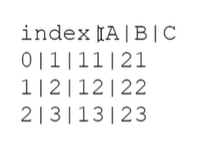

In [117]:
#헤더가 여러줄인 경우 ->1까지가 헤더라는 걸을 의미

#df = pd.read_csv('파일 경로', index_col=0, header=1)

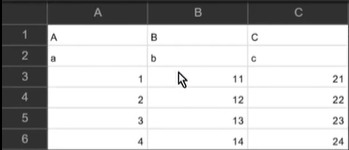

In [118]:
#데이터만 존재하고 칼럼명이 없는 경우

#df = pd.read_csv('파일 경로', index_col=0, index_col=0, names = ['칼럼명1', '칼럼명2', '칼럼명3'])

In [119]:
#원한는 칼럼 데이터만 사용하고 싶은 경우

#df = pd.read_csv('파일 경로', index_col=0, usecols=['칼럼명1', '칼럼명2'])

In [120]:
#파일 저장하기

#df.to_csv('파일 경로')